In [68]:
import numpy as np
import nibabel as nib
%matplotlib inline
import matplotlib.pyplot as plt
import albumentations as ab
from scipy.ndimage.filters import gaussian_filter, sobel
import skimage.transform as skTrans
import matplotlib.colors as matcolors
import seaborn as sns

In [104]:
def load_image(file_path):
    return np.load(file_path)[0,:,:,:,:]

def process_predictions(pred, focus_class):
    classes_num = pred.shape[-1]
    max_ind = np.argmax(pred, axis=-1)
    pred = np.max(pred, axis=-1)
    
    for i in range(0,classes_num):
        if i != focus_class:
            max_ind[max_ind==i] = 0
    
    return pred*max_ind

def show_image(image, label, pred, pred_mcd, index=0, axis=0, class_heat_map=False, mcd_steps=100):
    if axis == 0:
        image = image[index, :, :]
        label = label[index, :, :]
        pred = pred[index, :, :]
        pred_mcd = pred_mcd[index, :, :]
    elif axis == 1:
        image = image[:, index, :]
        label = label[:, index, :]
        pred = pred[:, index, :]
        pred_mcd = pred_mcd[:, index, :]
    else:
        image = image[:, :, index]
        label = label[:, :, index]
        pred = pred[:, :, index]
        pred_mcd = pred_mcd[:, :, index]
    
    colors = ["black","red", "blue"]
    cmap = matcolors.ListedColormap(colors)
    
    masked_label = np.ma.masked_where(label == 0.0, label)
    masked_pred = np.ma.masked_where(pred == 0.0, pred)
    masked_pred_mcd = np.ma.masked_where(pred_mcd == 0.0, pred_mcd)

    fig = plt.figure(figsize = (20, 12))
    subplot1 = plt.subplot(1,3,1)
    subplot1.set_title("Label")
    plt.imshow(image, interpolation='none')
    plt.imshow(masked_label, cmap=cmap, interpolation='none', vmin=0.0, vmax=2.0)
    
    subplot2 = plt.subplot(1,3,2)
    subplot2.set_title('Prediction')
    plt.imshow(image, interpolation='none')
    
    if class_heat_map:
        plt.imshow(masked_pred, cmap='hot', interpolation='none', vmin=0.0, vmax=1.0)
    else:
        plt.imshow(masked_pred, cmap=cmap, interpolation='none', vmin=0.0, vmax=2.0)

    
    subplot3 = plt.subplot(1,3,3)
    subplot3.set_title('Prediction MCD')
    plt.imshow(image, interpolation='none')

    if class_heat_map:
        plt.imshow(masked_pred_mcd, cmap='hot', interpolation='none', vmin=0.0, vmax=1.0)
    else:
        plt.imshow(masked_pred_mcd, cmap=cmap, interpolation='none', vmin=0.0, vmax=2.0)
    
    plt.show()

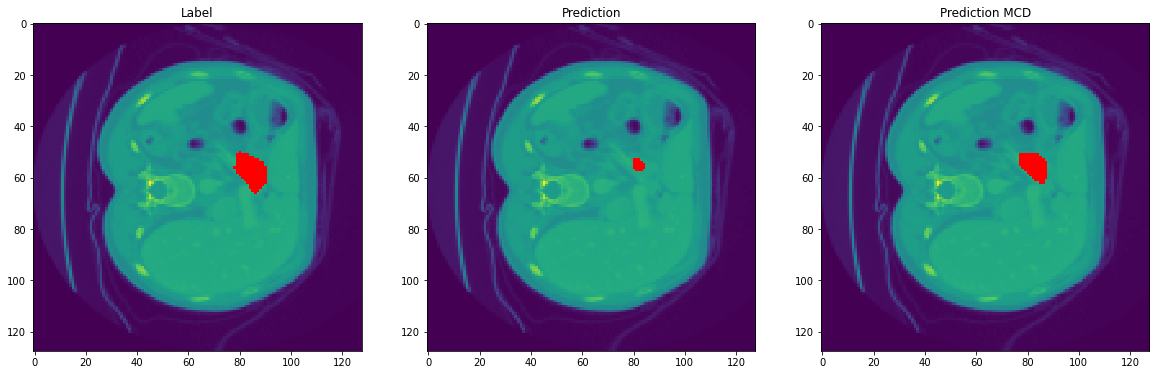

In [107]:
image = load_image(f"/Users/d070867/Desktop/Thesis/results/image.npy")

label = load_image(f"/Users/d070867/Desktop/Thesis/results/label.npy")
label = np.argmax(label, axis=-1)

pred = load_image(f"/Users/d070867/Desktop/Thesis/results/pred.npy")
pred = np.argmax(pred, axis=-1)

pred_mcd = load_image(f"/Users/d070867/Desktop/Thesis/results/pred_dropout.npy")
pred_mcd = np.argmax(pred_mcd, axis=-1)


#for i in range(0,128):
#    show_image(image,label,pred, pred_mcd,i,2)
show_image(image,label,pred, pred_mcd,78,2)


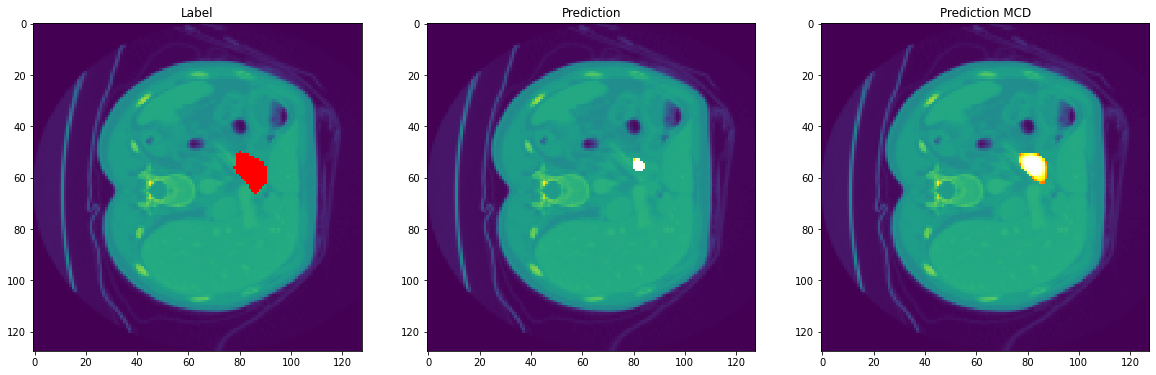

In [106]:
mcd_steps = 100
image = load_image(f"/Users/d070867/Desktop/Thesis/results/image.npy")

label = load_image(f"/Users/d070867/Desktop/Thesis/results/label.npy")
label = np.argmax(label, axis=-1)

pred = load_image(f"/Users/d070867/Desktop/Thesis/results/pred.npy")
#pred = np.argmax(pred, axis=-1)
pred = process_predictions(pred, focus_class=1)

pred_mcd = load_image(f"/Users/d070867/Desktop/Thesis/results/pred_dropout.npy")
pred_mcd = process_predictions(pred_mcd, focus_class=1) / mcd_steps

#for i in range(0,128):
#    show_image(image,label,pred, pred_mcd,i,2, class_heat_map=True, mcd_steps=mcd_steps)
show_image(image,label,pred, pred_mcd,78,2, class_heat_map=True, mcd_steps=mcd_steps)